# Autoencoder example (keras)

 


This nodebook consist of common autoencoders and its types.
Models built include:

1. a simple autoencoder based on a fully-connected layer

2. a sparse autoencoder

3. deep fully-connected autoencoder

4. a deep convolutional autoencoder

5. an image denoising model

6. a sequence-to-sequence autoencoder

7. a variational autoencoder


"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1) Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2) Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3) Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. It's simple! And you don't even need to understand any of these words to start using autoencoders in practice.

    References:1.https://blog.keras.io/building-autoencoders-in-keras.html
               2.https://www.youtube.com/watch?v=H1AllrJ-_30
        

# Single Layered AutoEncoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# An overview of gradient descent optimization algorithms:

Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. At the same time, every state-of-the-art Deep Learning library contains implementations of various algorithms to optimize gradient descent (e.g. lasagne's, caffe's, and keras' documentation). These algorithms, however, are often used as black-box optimizers, as practical explanations of their strengths and weaknesses are hard to come by.

### “Oh Gradient Descent — Find the Minima , control the variance and then update the Model’s parameters and finally lead us to Convergence”

#### Resource: https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

# Loss Function
#### Its a measure of how good our classifier is. So we compare the true value with value compared as output of training set

#### Loss Function Tutorial: https://www.youtube.com/watch?v=ANTXpzhYzys

# Optimizer/ Optimization function

## What are Optimization Algorithms ?
Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model. For example — we call the Weights(W) and the Bias(b) values of the neural network as its internal learnable parameters which are used in computing the output values and are learned and updated in the direction of optimal solution i.e minimizing the Loss by the network’s training process and also play a major role in the training process of the Neural Network Model .

#### Resource: https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

Gradient descent optimization algorithms:

#### Variants of Gradient Descent-

#### Resource: 
https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

The traditional Batch Gradient Descent will calculate the gradient of the whole Data set but will preform only one update , hence it can be very slow and hard to control for datasets which are very very large and don’t fit in the Memory. How big or small of an update to do is determined by the Learning Rate -η , and it is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.Another thing while using Standard batch Gradient descent is that it computes redundant updates for large data sets.

1. Stochastic gradient descent
Stochastic Gradient Descent(SGD) on the other hand performs a parameter update for each training example .It is usually much faster technique.It performs one update at a time.
θ=θ−η⋅∇J(θ;x(i);y(i)) , where {x(i) ,y(i)} are the training examples.
2. Mini Batch Gradient Descent
An improvement to avoid all the problems and demerits of SGD and standard Gradient Descent would be to use Mini Batch Gradient Descent as it takes the best of both techniques and performs an update for every batch with n training examples in each batch.

Now due to these frequent updates ,parameters updates have high variance and causes the Loss function to fluctuate to different intensities. This is actually a good thing because it helps us discover new and possibly better local minima , whereas Standard Gradient Descent will only converge to the minimum of the basin as mentioned above.

1. Momentum
The high variance oscillations in SGD makes it hard to reach convergence , so a technique called Momentum was invented which accelerates SGD by navigating along the relevant direction and softens the oscillations in irrelevant directions.In other words all it does is adds a fraction ‘γ’ of the update vector of the past step to the current update vector.
2. Nesterov accelerated gradient
3. #### Adagrad:
It simply allows the learning Rate -η to adapt based on the parameters. So it makes big updates for infrequent parameters and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data.
It uses a different learning Rate for every parameter θ at a time step based on the past gradients which were computed for that parameter.
4. #### Adadelta
:It is an extension of AdaGrad which tends to remove the decaying learning Rate problem of it. Instead of accumulating all previous squared gradients, Adadelta limits the window of accumulated past gradients to some fixed size w.
Instead of inefficiently storing w previous squared gradients, the sum of gradients is recursively defined as a decaying mean of all past squared gradients. The running average E[g²](t) at time step t then depends (as a fraction γ similarly to the Momentum term) only on the previous average and the current gradient.
5. RMSprop
6. #### Adam: Adaptive Moment Estimation
Since we are calculating individual learning rates for each parameter , why not calculate individual momentum changes for each parameter and store them separately. This is where a new modified technique and improvement comes into play called as Adam.
Adam
Adam stands for ## Adaptive Moment Estimation. Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta ,Adam also keeps an exponentially decaying average of past gradients M(t), similar to momentum.
7. AdaMax
8. Nadam
9. AMSGrad

    


Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:


An optimizer is one of the two arguments required for compiling a Keras model:

You can either instantiate an optimizer before passing it to model.compile() , as in the below example, or you can call it by its name. In the latter case, the default parameters for the optimizer will be used.

#### when passing optimizer by name: default parameters will be used
-> model.compile(loss='mean_squared_error', optimizer='sgd')



In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



#### Adam works well in practice and compares favorably to other adaptive learning-method algorithms as it converges very fast and the learning speed of the Model is quiet Fast and efficient and also it rectifies every problem that is faced in other optimization techniques such as vanishing Learning rate , slow convergence or High variance in the parameter updates which leads to fluctuating Loss function

Input data= MNIST digits, Labels are discareded (since we're only interested in encoding/decoding the input images).



In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print ("x_train.shape")
print ("x_test.shape")

x_train.shape
x_test.shape


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.3617 - val_loss: 0.2707
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2632 - val_loss: 0.2523
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2430 - val_loss: 0.2311
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2234 - val_loss: 0.2133
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2081 - val_loss: 0.2006
Epoch 6/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1971 - val_loss: 0.1911
Epoch 7/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1884 - val_loss: 0.1831
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1811 - val_loss: 0.1763
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1749 - val_loss: 0.1704
Epoch

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.



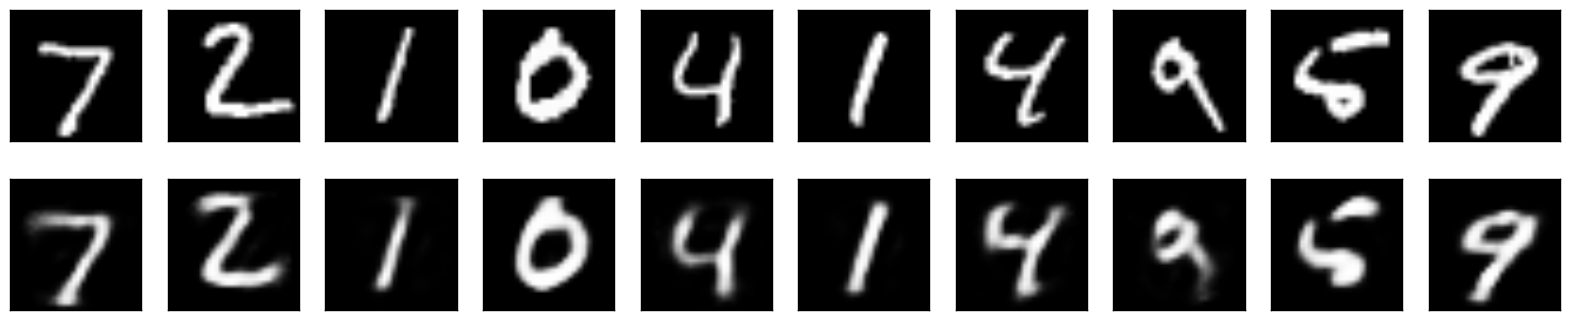

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits.
We are losing quite a bit of detail with this basic approach.



Separating the encoder and decoder parts of a deep autocoder are not that obvious in keras (see issue https://github.com/benjaminirving/mlseminars-autoencoders/issues/1 ). Below is a simple example of how to extract the encoded part. 

You basically have to define the links between the layers that you are interested in so that keras knows the beginning and end layers (in future maybe keras will define an input_layer input under Model).

The code basically looks like this:

decoder1 = autoencoder.layers[-3]
decoder2 = autoencoder.layers[-2]
decoder3 = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output=decoder3(decoder2(decoder1(encoded_input))))

and, below is a full working example (based on the autoencoder from https://blog.keras.io/building-autoencoders-in-keras.html).

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32
# Model definition
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Training data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Model compilation
autoencoder = Model(input=input_img, output=decoded)
autoencoder.summary()

encoder = Model(input=input_img, output=encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
# create the decoder model

decoder1 = autoencoder.layers[-3]
decoder2 = autoencoder.layers[-2]
decoder3 = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output=decoder3(decoder2(decoder1(encoded_input))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Model training
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# Testing

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


(60000, 784)
(10000, 784)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 128)           100480      input_3[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 64)            8256        dense_7[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 32)            2080        dense_8[0][0]                    
_________________________________________________________________